In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

%matplotlib inline
import lenstronomy
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Data.pixel_grid import PixelGrid
from lenstronomy.Data.psf import PSF
from lenstronomy.ImSim.image_model import ImageModel
from lenstronomy.LightModel.light_model import LightModel
import lenstronomy.Util.param_util as param_util

In [2]:
deltaPix = 0.05  # size of pixel in angular coordinates #
ra_at_xy_0, dec_at_xy_0 = (
    -5,
    -5,
)  # coordinate in angles (RA/DEC) at the position of the pixel edge (0,0)
transform_pix2angle = (
    np.array([[1, 0], [0, 1]]) * deltaPix
)  # linear translation matrix of a shift in pixel in a shift in coordinates
kwargs_pixel = {
    "nx": 200,
    "ny": 200,  # number of pixels per axis
    "ra_at_xy_0": ra_at_xy_0,  # RA at pixel (0,0)
    "dec_at_xy_0": dec_at_xy_0,  # DEC at pixel (0,0)
    "transform_pix2angle": transform_pix2angle,
}
pixel_grid = PixelGrid(**kwargs_pixel)

kwargs_psf = {"psf_type": "NONE"}
psf = PSF(**kwargs_psf)

In [3]:
source_light_model_list = ["SERSIC_ELLIPSE"]
lightModel_source = LightModel(light_model_list=source_light_model_list)

# define the parameters #
e1, e2 = param_util.phi_q2_ellipticity(phi=0.8, q=0.5)
kwargs_light_source = [
    {
        "amp": 100,
        "R_sersic": 0.1,
        "n_sersic": 1.5,
        "e1": e1,
        "e2": e2,
        "center_x": 0.0,
        "center_y": 0.0,
    }
]
# e1, e2 = param_util.phi_q2_ellipticity(phi=0.5, q=0.7)
# kwargs_light_lens = [
#     {
#         "amp": 1000,
#         "R_sersic": 0.1,
#         "n_sersic": 2.5,
#         "e1": e1,
#         "e2": e2,
#         "center_x": 0.1,
#         "center_y": 0,
#     }
# ]

# Single plane

In [16]:
lens_model_list = ["SIE"]
lensModel = LensModel(lens_model_list=lens_model_list)
kwargs_lens = [{"theta_E": 1.5, "e1": 0.1, "e2": 0.1, "center_x": 0.1, "center_y": 0}]

kwargs_numerics = {
    "supersampling_factor": 1,  # each pixel gets super-sampled (in each axis direction)
    "supersampling_convolution": False,
}
imageModel = ImageModel(
    data_class=pixel_grid,
    psf_class=psf,
    lens_model_class=lensModel,
    source_model_class=lightModel_source,
    lens_light_model_class=None,
    point_source_class=None,  # in this example, we do not simulate point source.
    kwargs_numerics=kwargs_numerics,
)

image = imageModel.image(
    kwargs_lens=kwargs_lens,
    kwargs_source=kwargs_light_source,
    kwargs_lens_light=[],
    kwargs_ps=[],
)

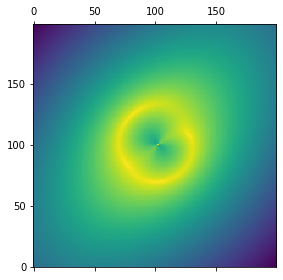

In [17]:
f, ax = plt.subplots(figsize=(4, 4))
ax.matshow(np.log10(image), origin="lower")
f.tight_layout()
plt.show()

# Multiplane two planes

In [6]:
lens_model_list_mp = ["SIE", "SIE"]
redshift_list = [0.5, 0.1]
lensModel = LensModel(
    lens_model_list=lens_model_list_mp,
    z_source=1.5,
    lens_redshift_list=redshift_list,
    multi_plane=True,
)
kwargs_lens = [
    {"theta_E": 1.1, "e1": 0.1, "e2": 0.1, "center_x": 0.1, "center_y": 0},
    {"theta_E": 1.1, "e1": 0.1, "e2": 0.1, "center_x": 0.0, "center_y": -0.3},
]

kwargs_numerics = {
    "supersampling_factor": 1,  # each pixel gets super-sampled (in each axis direction)
    "supersampling_convolution": False,
}
imageModel = ImageModel(
    data_class=pixel_grid,
    psf_class=psf,
    lens_model_class=lensModel,
    source_model_class=lightModel_source,
    lens_light_model_class=None,
    point_source_class=None,  # in this example, we do not simulate point source.
    kwargs_numerics=kwargs_numerics,
)

image = imageModel.image(
    kwargs_lens=kwargs_lens,
    kwargs_source=kwargs_light_source,
    kwargs_lens_light=[],
    kwargs_ps=[],
)

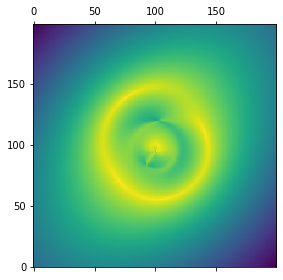

In [7]:
f, ax = plt.subplots(figsize=(4, 4))
ax.matshow(np.log10(image), origin="lower")
f.tight_layout()
plt.show()

# Multiplane 5 planes

In [8]:
N = 5
lens_model_list_mp = ["SIE"] * N
redshift_list = np.linspace(0.1, 1.9, N)
lensModel = LensModel(
    lens_model_list=lens_model_list_mp,
    z_source=2,
    lens_redshift_list=redshift_list,
    multi_plane=True,
)

complex_ellipticity = list(
    param_util.phi_q2_ellipticity(phi=0.2 + 0.2 * i, q=0.3 + 0.1 * i) for i in range(N)
)
kwargs_lens = list(
    {
        "theta_E": 0.5,
        "e1": complex_ellipticity[i][0],
        "e2": complex_ellipticity[i][1],
        "center_x": 0.0,
        "center_y": 0.5 - 0.1 * i,
    }
    for i in range(N)
)

kwargs_numerics = {
    "supersampling_factor": 1,  # each pixel gets super-sampled (in each axis direction)
    "supersampling_convolution": False,
}
imageModel = ImageModel(
    data_class=pixel_grid,
    psf_class=psf,
    lens_model_class=lensModel,
    source_model_class=lightModel_source,
    lens_light_model_class=None,
    point_source_class=None,  # in this example, we do not simulate point source.
    kwargs_numerics=kwargs_numerics,
)

image = imageModel.image(
    kwargs_lens=kwargs_lens,
    kwargs_source=kwargs_light_source,
    kwargs_lens_light=[],
    kwargs_ps=[],
)

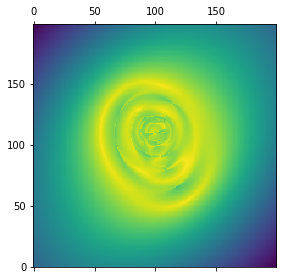

In [9]:
f, ax = plt.subplots(figsize=(4, 4))
ax.matshow(np.log10(image), origin="lower")
f.tight_layout()
plt.show()

# Multiplane 10 planes

In [10]:
N = 10
lens_model_list_mp = ["SIE"] * N
redshift_list = np.linspace(0.1, 1.9, N)
lensModel = LensModel(
    lens_model_list=lens_model_list_mp,
    z_source=2,
    lens_redshift_list=redshift_list,
    multi_plane=True,
)
kwargs_lens = list(
    {
        "theta_E": 0.1 + 0.05 * i,
        "e1": 0.1,
        "e2": 0.1,
        "center_x": -0.5 + 0.1 * i,
        "center_y": 0.5 - 0.1 * i,
    }
    for i in range(N)
)

kwargs_numerics = {
    "supersampling_factor": 1,  # each pixel gets super-sampled (in each axis direction)
    "supersampling_convolution": False,
}
imageModel = ImageModel(
    data_class=pixel_grid,
    psf_class=psf,
    lens_model_class=lensModel,
    source_model_class=lightModel_source,
    lens_light_model_class=None,
    point_source_class=None,  # in this example, we do not simulate point source.
    kwargs_numerics=kwargs_numerics,
)

image = imageModel.image(
    kwargs_lens=kwargs_lens,
    kwargs_source=kwargs_light_source,
    kwargs_lens_light=[],
    kwargs_ps=[],
)

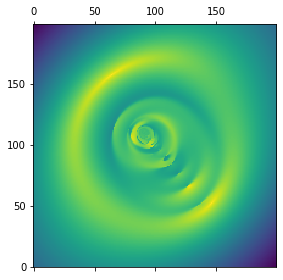

In [11]:
f, ax = plt.subplots(figsize=(4, 4))
ax.matshow(np.log10(image), origin="lower")
f.tight_layout()
plt.show()